In [1]:
import keras    #----------- For dataset -------------#
import tensorflow as tf #------------- To apply model--------------#
from tensorflow import keras #----------------- For satisfaction to import keras--------------------#
from keras.datasets import fashion_mnist  #------------------Import dataset-------------#
import numpy as np #--------------For preprocessing----------#
from tensorflow.keras.optimizers import RMSprop #------------For Optimiser--------------#
from keras.models import Sequential  #-------------Initialise neural network-------------#
from keras.layers import Conv2D  #-------------Convolution Step-------------#
from keras.layers import MaxPooling2D #------------Max pooling step-----------------#
from keras.layers import Flatten #------------Flatten step------------------#
from keras.layers import Dense #-------------To make layers---------------#
import matplotlib.pyplot as plt #------------TO See Image--------------#
from google.colab import files #--------------Upload image for testing----------#
from keras.preprocessing import image #--------------Preprocessign the image---------#
from google.colab import drive #-----------Connect to google drive to save image----------#
import os #-------To change directory in google drive--------#
from keras.utils import np_utils #------Convert label dataset to one hot encode vector-------------#
from keras.layers import Dropout #-----To detect features---------_#
from keras.layers import BatchNormalization #------For normalisation the dataset---------#
from keras import backend as K #----It perfoem the operation to backend-----------#
from google.colab import auth #-------to connect the google drive--------#
from oauth2client.client import GoogleCredentials #-------To connect the google drive----------_#
import getpass
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#May be some libraries we can not use but these library are used for all CNN project.

Using TensorFlow backend.


In [0]:
# T-shirt/top
# Trouser/pants
# Pullover shirt
# Dress
# Coat
# Sandal
# Shirt
# Sneaker
# Bag
# Ankle boot

In [0]:
#divide dataset into training and testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# Explore the dataset
print ("Number of samples in X training data: " + str(len(x_train)))
print ("Number of samples in Y training data: " + str(len(y_train)))
print ("Dimensions of a single image in x_train:" + str(x_train[0].shape))
print("-------------------------------------------------------------")
print ("Number of samples in X test data: " + str(len(x_test)))
print ("Number of samples in Y test data: " + str(len(y_test)))
print ("Dimensions of single image in x_test:" + str(x_test[0].shape))

Number of samples in X training data: 60000
Number of samples in Y training data: 60000
Dimensions of a single image in x_train:(28, 28)
-------------------------------------------------------------
Number of samples in X test data: 10000
Number of samples in Y test data: 10000
Dimensions of single image in x_test:(28, 28)


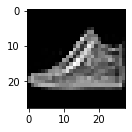

In [5]:
#nrows, ncols and index
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray')) #cmap is set the gray_image

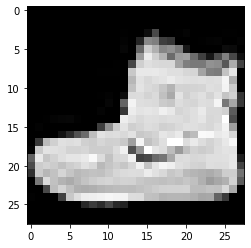

In [6]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

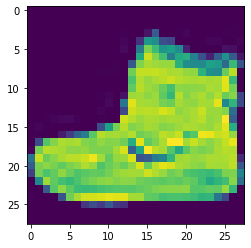

In [7]:
plt.imshow(x_train[0])

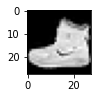

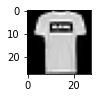

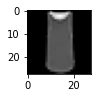

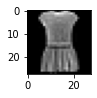

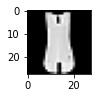

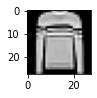

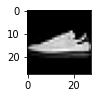

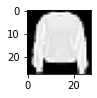

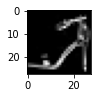

In [8]:
for i in range(9):
  plt.subplot(330 + 1+i)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
  plt.show()

In [9]:
#-----Storeing the number of rows and columns------#
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
img_rows

28

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train.shape[0]

60000

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#grayscale channel 1 and colar iamge is 3
#reshape change the array without changing the data

In [0]:
# Storing the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [15]:
#normalisation of the dataset
#hot encding
num_classes = 10
print('Before:',y_test[0])
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)
print('After:',y_test[0])
x_train = x_train/255.0
x_test = x_test/255.0

Before: 9
After: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
# Calculate the number of classes and number of pixels 
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [17]:
num_classes

10

In [18]:
y_test.shape

(10000, 10)

In [19]:
num_pixels #28*28

784

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #----for over fitting.

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #softmax is convert 0 to 1

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [21]:
batch_size = 128
epochs = 100
model_fitting = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 137us/step - loss: 2.5237 - accuracy: 0.2727 - val_loss: 1.5573 - val_accuracy: 0.4852
Epoch 2/100
60000/60000 [==============================] - 6s 106us/step - loss: 1.5370 - accuracy: 0.5063 - val_loss: 0.8548 - val_accuracy: 0.6994
Epoch 3/100
60000/60000 [==============================] - 6s 103us/step - loss: 1.2223 - accuracy: 0.6043 - val_loss: 0.7402 - val_accuracy: 0.7372
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 1.0689 - accuracy: 0.6514 - val_loss: 0.6797 - val_accuracy: 0.7590
Epoch 5/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.9708 - accuracy: 0.6823 - val_loss: 0.6385 - val_accuracy: 0.7730
Epoch 6/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.9070 - accuracy: 0.7016 - val_loss: 0.6095 - val_accuracy: 0.7833
Epoch 7/100
60000/60000 [==============================]

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32899036469459536
Test accuracy: 0.8844000101089478


In [23]:
prediction = model.predict(x_test)
print(np.argmax(np.round(prediction[1])))

2


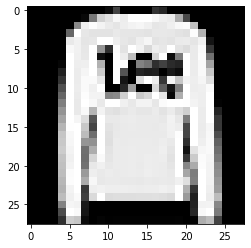

In [27]:
plt.imshow(x_test[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

In [28]:
# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 28, 28, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# Load an image and predict the apparel class
img = load_image('sandal.jpg')
# Predict the apparel class
class_prediction = model.predict_classes(img)
print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)


5
Sandal


In [46]:
uploaded = files.upload()
for i in uploaded.keys():

  path = '/content/'+i
  img = image.load_img(path,color_mode = "grayscale" ,target_size=(28,28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  class_prediction = model.predict(images, batch_size=128)
  print(classes)

class_prediction = np.argmax(classes, axis=1)

# class_prediction = model.predict_classes(img)
# print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"
print(product)

Saving sandal.jpg to sandal (17).jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Sandal


In [49]:
model.save('fashion_item_prediction.h5')
# model = load_model('fashion_item_prediction_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
